In [107]:
import pandas as pd
import geopandas as gpd

In [108]:
import numpy as np
import matplotlib.pyplot as plt

## Loading and Slightly modifying the data for further processing

In [109]:
#Impoting the data on Wildfires in Alberta (Provided by ICG)
fire_data=pd.read_excel('data/fp-historical-wildfire-data-2006-2021.xlsx')

In [110]:
fire_data.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaT,2021-06-28 22:26:00,0.01,2021-07-01 13:26:00,10.00,NaT,NaN,2021-07-01 13:44:00,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaT,2021-03-30 14:30:00,0.01,2021-03-30 14:30:00,0.01,2021-03-30 14:35:00,0.01,2021-04-09 08:30:00,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaT,2021-04-16 16:57:00,0.10,2021-04-16 16:57:00,0.10,NaT,NaN,2021-04-17 14:15:00,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaT,2021-04-17 15:20:00,0.01,2021-04-17 15:20:00,0.01,NaT,NaN,2021-04-17 15:24:00,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaT,2021-04-01 19:10:00,7.13,2021-04-02 11:00:00,7.13,2021-04-02 15:52:00,7.13,2021-04-12 14:30:00,7.13


In [111]:
#Filtering the dataframe and deleteling those colums which have absolutely no benefits in finding answers to our questions
fire_data=fire_data[['fire_year','current_size','fire_fighting_start_size','size_class',
                     'fire_location_latitude','fire_location_longitude','fire_origin','general_cause_desc',
                     'industry_identifier_desc','responsible_group_desc','activity_class','true_cause',
                     'fire_spread_rate','weather_conditions_over_fire','temperature','relative_humidity',
                     'wind_direction','wind_speed','uc_hectares','ex_hectares','ex_fs_date','fire_position_on_slope','fuel_type']]

In [112]:
#Geographical Boundary data for FSA regions in Canada (Having FSA Codes)
fsa_data = gpd.read_file('data/fsa_data/lfsa000a16a_e.shp')

In [113]:
fsa_data.head()

,CFSAUID,PRUID,PRNAME,geometry
0,B0S,12,Nova Scotia / Nouvelle-Écosse,"POLYGON ((8287872.686 1433886.411, 8287873.540..."
1,B0T,12,Nova Scotia / Nouvelle-Écosse,"POLYGON ((8325264.071 1379162.497, 8326113.200..."
2,B0V,12,Nova Scotia / Nouvelle-Écosse,"POLYGON ((8258142.146 1365762.546, 8258128.820..."
3,B0W,12,Nova Scotia / Nouvelle-Écosse,"POLYGON ((8265414.340 1362283.174, 8267301.429..."
4,B1S,12,Nova Scotia / Nouvelle-Écosse,"POLYGON ((8576653.971 1712481.206, 8576683.869..."


In [114]:
fsa_data=fsa_data[['CFSAUID','geometry','PRNAME']]
fsa_data=fsa_data.rename(columns={'CFSAUID':'FSACode'})

In [115]:
#FSA Names for the FSA Codes
fsa_names = pd.read_csv("data/FSAName.csv")

In [116]:
fsa_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  110 non-null    int64 
 1   FSACode     110 non-null    object
 2   FSAName     110 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [117]:
#Census SubDivision Boundary data
csd_data = gpd.read_file('data/csd_data/lcsd000a16a_e.shp')

In [118]:
csd_data.head()

,CSDUID,CSDNAME,CSDTYPE,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,ERUID,ERNAME,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry
0,1001181,Riverhead,T,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001214,"Division No. 1, Subd. C",1010,Avalon Peninsula,999,7,None,None,None,None,"POLYGON ((8970492.923 2072892.780, 8970604.123..."
1,1001186,Admirals Beach,T,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001214,"Division No. 1, Subd. C",1010,Avalon Peninsula,999,7,None,None,None,None,"POLYGON ((8960007.940 2060843.346, 8959926.140..."
2,1001192,St. Joseph's,T,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001214,"Division No. 1, Subd. C",1010,Avalon Peninsula,999,7,None,None,None,None,"POLYGON ((8959092.909 2077700.343, 8959190.894..."
3,1001197,Mount Carmel-Mitchells Brook-St. Catherine's,T,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001214,"Division No. 1, Subd. C",1010,Avalon Peninsula,997,5,None,None,None,None,"POLYGON ((8963726.323 2088192.286, 8963385.197..."
4,1001434,South River,T,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001472,Holyrood,1010,Avalon Peninsula,996,4,None,None,None,None,"POLYGON ((8947027.800 2129069.297, 8947370.966..."


In [119]:
csd_data=csd_data[['CSDNAME','geometry']]
csd_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5162 entries, 0 to 5161
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CSDNAME   5162 non-null   object  
 1   geometry  5162 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 80.8+ KB


In [120]:
#CSD-wise population data of indigenous groups in Canada
indi_data=pd.read_csv('data/indi_population.csv')

In [121]:
indi_data.head()

,REF_DATE,GEO,DGUID,Gender (3a),Age (8G),Statistics (5),Coordinate,Indigenous identity (9):Total - Indigenous identity[1],Symbol,Indigenous identity (9):Indigenous identity[2],...,Indigenous identity (9):Métis[5],Symbol.4,Indigenous identity (9):Inuk (Inuit)[6],Symbol.5,Indigenous identity (9):Multiple Indigenous responses[7],Symbol.6,Indigenous identity (9):Indigenous responses not included elsewhere[8],Symbol.7,Indigenous identity (9):Non-Indigenous identity[9],Symbol.8
0,2021,Canada,2021A000011124,Total - Gender,Total - Age,2021 Counts,1.1.1.1,36328475.0,NaN,1807250.0,...,624215.0,NaN,70540.0,NaN,28860.0,NaN,35225.0,NaN,34521225.0,NaN
1,2021,Canada,2021A000011124,Total - Gender,Total - Age,2016 Counts,1.1.1.2,34460065.0,NaN,1673780.0,...,587545.0,NaN,65025.0,NaN,21310.0,NaN,22670.0,NaN,32786280.0,NaN
2,2021,Canada,2021A000011124,Total - Gender,Total - Age,% distribution (2021),1.1.1.3,100.0,NaN,5.0,...,1.7,NaN,0.2,NaN,0.1,NaN,0.1,NaN,95.0,NaN
3,2021,Canada,2021A000011124,Total - Gender,Total - Age,% distribution (2016),1.1.1.4,100.0,NaN,4.9,...,1.7,NaN,0.2,NaN,0.1,NaN,0.1,NaN,95.1,NaN
4,2021,Canada,2021A000011124,Total - Gender,Total - Age,% change (2016 to 2021),1.1.1.5,5.5,NaN,9.4,...,6.3,NaN,8.5,NaN,35.5,NaN,55.7,NaN,5.3,NaN


In [122]:
indi_data = indi_data[
    (indi_data['Gender (3a)'] == 'Total - Gender') &
    (indi_data['Age (8G)'] == 'Total - Age') &
    (indi_data['Statistics (5)'] =='2021 Counts')
]

In [123]:
indi_data.loc[:, 'indi_population'] = indi_data['Indigenous identity (9):Total - Indigenous identity[1]'] + \
                                     indi_data['Indigenous identity (9):Indigenous identity[2]'] + \
                                     indi_data['Indigenous identity (9):Single Indigenous responses[3]'] + \
                                     indi_data['Indigenous identity (9):First Nations (North American Indian)[4]'] + \
                                     indi_data['Indigenous identity (9):Métis[5]'] + \
                                     indi_data['Indigenous identity (9):Inuk\xa0(Inuit)[6]'] + \
                                     indi_data['Indigenous identity (9):Multiple Indigenous responses[7]'] + \
                                     indi_data['Indigenous identity (9):Indigenous responses not included elsewhere[8]'] + \
                                     indi_data['Indigenous identity (9):Non-Indigenous identity[9]']

In [124]:
indi_data=indi_data[['GEO','indi_population']]
indi_data=indi_data.rename(columns={'GEO': 'CSDNAME'})

In [125]:
indi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5468 entries, 0 to 656040
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CSDNAME          5468 non-null   object 
 1   indi_population  4824 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.2+ KB


### Adding the geographical areas (CSD & FSA) based on latitutes and longitudes

In [126]:
#Creating a new feature for getting geometrical location points from latitudes and longitudes
fire_geometry = gpd.points_from_xy(fire_data['fire_location_longitude'], fire_data['fire_location_latitude'])

In [127]:
fire_gdf = gpd.GeoDataFrame(fire_data, geometry=fire_geometry) #Adding the geometry feature to dataframe

In [128]:
#checking if fsa_data has crs
if fsa_data.crs is not None:
    print("Wildfire data already has a CRS:", fsa_data.crs)
else:
    print("Wildfire data CRS is None. You'll need to set it.")

Wildfire data already has a CRS: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",63.390675],PARAMETER["central_meridian",-91.8666666666667],PARAMETER["standard_parallel_1",49],PARAMETER["standard_parallel_2",77],PARAMETER["false_easting",6200000],PARAMETER["false_northing",3000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [129]:
#checking if fire_gdf has crs
if fire_gdf.crs is not None:
    print("Wildfire data already has a CRS:", fire_gdf.crs)
else:
    print("Wildfire data CRS is None. You'll need to set it.")

Wildfire data CRS is None. You'll need to set it.


In [130]:
# Setting a random crs to fire_gdf and then making its crs same as fsa_data
fire_gdf = fire_gdf.set_crs(epsg=4326)
fire_gdf = fire_gdf.to_crs(fsa_data.crs)

In [131]:
# Now since crs of both DFs are same, we can allocate FSAs to the fire_gdf based on geographical points
fire_gdf = gpd.sjoin(fire_gdf, fsa_data, how='inner', predicate='within').drop('index_right',axis=1)

In [132]:
#Allocating CSDs to fire_gfd based on geographical points
fire_gdf = gpd.sjoin(fire_gdf, csd_data, how='inner', predicate='within').drop('index_right',axis=1)

In [133]:
fire_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 22914 entries, 0 to 22913
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fire_year                     22914 non-null  int64         
 1   current_size                  22914 non-null  float64       
 2   fire_fighting_start_size      16507 non-null  float64       
 3   size_class                    22914 non-null  object        
 4   fire_location_latitude        22914 non-null  float64       
 5   fire_location_longitude       22914 non-null  float64       
 6   fire_origin                   22905 non-null  object        
 7   general_cause_desc            22914 non-null  object        
 8   industry_identifier_desc      408 non-null    object        
 9   responsible_group_desc        9031 non-null   object        
 10  activity_class                14204 non-null  object        
 11  true_cause               

### Merging the Population and FSA names data

In [134]:
#merging data to get indigenous population on table
combined_data = pd.merge(left=fire_gdf, right=indi_data, on='CSDNAME', how='left')

In [135]:
combined_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fire_year                     22916 non-null  int64         
 1   current_size                  22916 non-null  float64       
 2   fire_fighting_start_size      16507 non-null  float64       
 3   size_class                    22916 non-null  object        
 4   fire_location_latitude        22916 non-null  float64       
 5   fire_location_longitude       22916 non-null  float64       
 6   fire_origin                   22907 non-null  object        
 7   general_cause_desc            22916 non-null  object        
 8   industry_identifier_desc      408 non-null    object        
 9   responsible_group_desc        9033 non-null   object        
 10  activity_class                14206 non-null  object        
 11  true_cause          

In [136]:
#Now we can drop geometry feature and turn the data set from geo-dataframe to pandas dataframe
combined_data=combined_data.drop('geometry',axis=1)
fire_data=pd.DataFrame(combined_data)

In [137]:
#merging data to get fsa regions names on table
fire_data = pd.merge(left=fire_data, right=fsa_names, on='FSACode', how='left').drop('Unnamed: 0',axis=1)

In [138]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fire_year                     22916 non-null  int64         
 1   current_size                  22916 non-null  float64       
 2   fire_fighting_start_size      16507 non-null  float64       
 3   size_class                    22916 non-null  object        
 4   fire_location_latitude        22916 non-null  float64       
 5   fire_location_longitude       22916 non-null  float64       
 6   fire_origin                   22907 non-null  object        
 7   general_cause_desc            22916 non-null  object        
 8   industry_identifier_desc      408 non-null    object        
 9   responsible_group_desc        9033 non-null   object        
 10  activity_class                14206 non-null  object        
 11  true_cause                  

### Refining Data 

In [139]:
fire_data[['PRNAME']].value_counts()

PRNAME                                 
Alberta                                    22913
British Columbia / Colombie-Britannique        3
Name: count, dtype: int64

In [140]:
#Dropping the rows which don't have data of Alberta
fire_data=fire_data[fire_data['PRNAME']!='British Columbia / Colombie-Britannique']
fire_data=fire_data.reset_index()

In [141]:
#Dropping all the less useful columns
fire_data=fire_data.drop(['fire_location_latitude',
                                  'fire_location_longitude','ex_hectares',
                                  'ex_fs_date','PRNAME'],axis=1)

In [142]:
fire_data.isnull().sum()

index                               0
fire_year                           0
current_size                        0
fire_fighting_start_size         6409
size_class                          0
fire_origin                         9
general_cause_desc                  0
industry_identifier_desc        22505
responsible_group_desc          13880
activity_class                   8707
true_cause                      10423
fire_spread_rate                 2609
weather_conditions_over_fire     2656
temperature                      2657
relative_humidity                2659
wind_direction                   2660
wind_speed                       2660
uc_hectares                         0
fire_position_on_slope           2649
fuel_type                        6889
FSACode                             0
CSDNAME                             0
indi_population                  1207
FSAName                          2650
dtype: int64

In [143]:
fire_data['fire_origin']=fire_data['fire_origin'].fillna('undetermined')
fire_data['industry_identifier_desc']=fire_data['industry_identifier_desc'].fillna('undetermined')
fire_data['responsible_group_desc']=fire_data['responsible_group_desc'].fillna('undetermined')
fire_data['activity_class']=fire_data['activity_class'].fillna('undetermined')
fire_data['true_cause']=fire_data['true_cause'].fillna('undetermined')

# EDA: EXPLORING THE DATA

### Most Vulnerable FSA Regions

In [144]:
fire_data['FSAName'].value_counts()

FSAName
GRANDE PRAIRIE  AB DCF              7610
EDMONTON # 4  AB DCF                3364
CALGARY # 2  AB DCF                 1734
EDMONTON # 7  AB DCF                1644
CANMORE AB STN MAIN                 1272
CALGARY  AB DCF                     1088
EDMONTON # 1  AB DCF                1078
EDMONTON # 3  AB DCF                1026
LETHBRIDGE  AB DCF                   692
ROCKY MOUNTAIN HOUSE AB STN MAIN     628
ATHABASCA AB STN MAIN                 47
EDMONTON # 6  AB DCF                  36
COLD LAKE AB STN MAIN                 27
CALGARY AB LCD 23                      6
BONNYVILLE AB STN MAIN                 4
EDMONTON  AB DCF                       4
FORT MCMURRAY AB LCD MAIN              2
COCHRANE AB LCD MAIN                   1
Name: count, dtype: int64

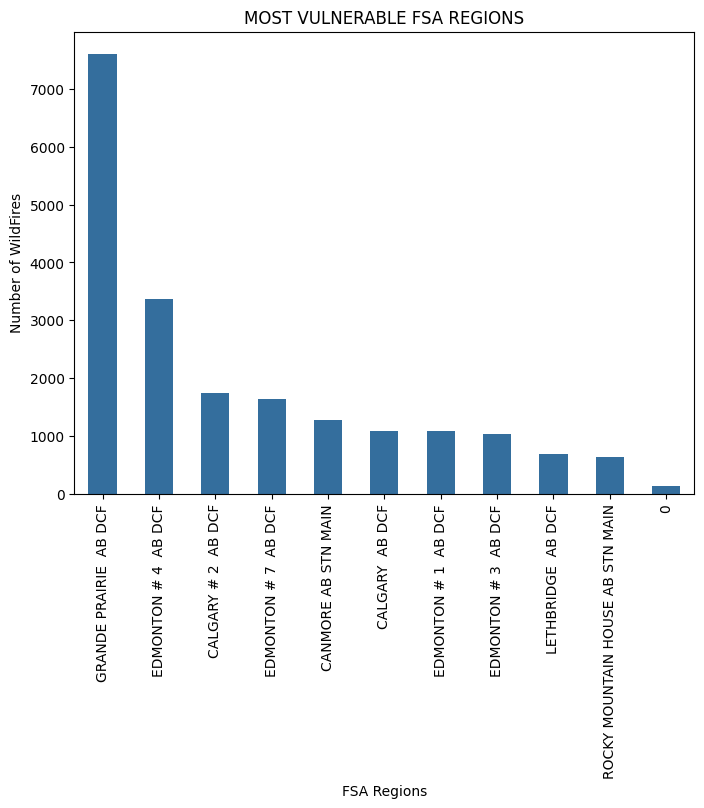

In [145]:
# Create a bar chart
value_counts=fire_data['FSAName'].value_counts()
top_10 = value_counts.nlargest(10)
others = value_counts.iloc[10:].sum()

# Combine data for plotting
data_to_plot = pd.concat([top_10, pd.Series([others], name="Others")])
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='#346E9D')  

# Add labels and title
plt.xlabel('FSA Regions')
plt.ylabel('Number of WildFires')
plt.title('MOST VULNERABLE FSA REGIONS')

# Display the plot
plt.show()

### Finding the Reasons behind WildFires

In [146]:
fire_data['fire_origin'].value_counts()

fire_origin
Provincial Land       16344
Private Land           3198
Indian Reservation     2883
Provincial Park         241
Metis Settlement        139
DND                      97
undetermined              9
National Park             2
Name: count, dtype: int64

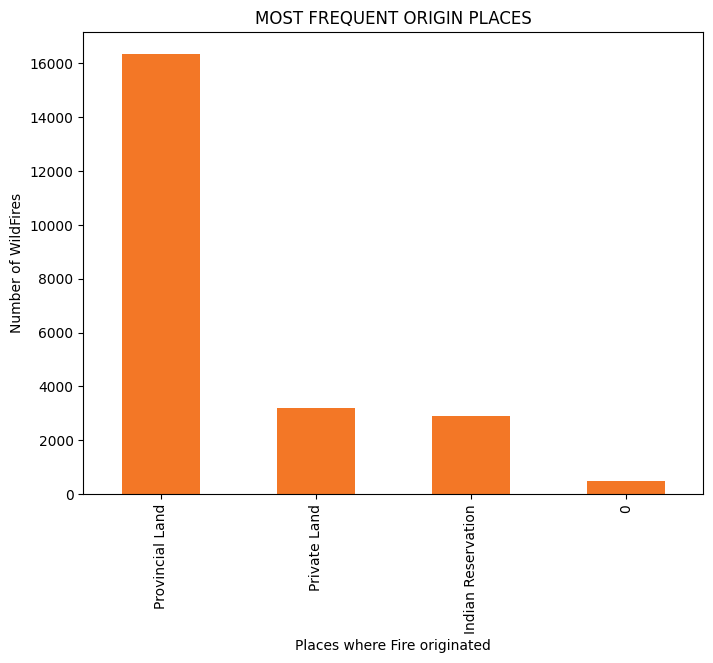

In [147]:
# Create a bar chart
value_counts=fire_data['fire_origin'].value_counts()
top_3 = value_counts.nlargest(3)
others = value_counts.iloc[3:].sum()

# Combine data for plotting
data_to_plot = pd.concat([top_3, pd.Series([others], name="Others")])
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='#F37726')  

# Add labels and title
plt.xlabel('Places where Fire originated')
plt.ylabel('Number of WildFires')
plt.title('MOST FREQUENT ORIGIN PLACES')

# Display the plot
plt.show()

In [148]:
fire_data['general_cause_desc'].value_counts()

general_cause_desc
Lightning               7870
Recreation              5239
Resident                3950
Incendiary              1995
Power Line Industry     1177
Undetermined             736
Agriculture Industry     497
Forest Industry          417
Oil & Gas Industry       409
Other Industry           295
Railroad                 126
Government               116
Restart                   65
Prescribed Fire           19
Under Investigation        2
Name: count, dtype: int64

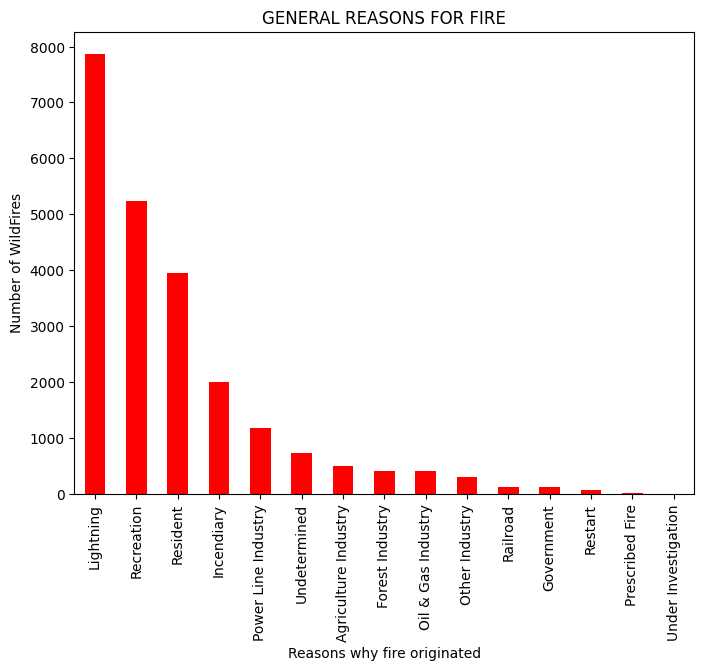

In [192]:
# Create a bar chart
data_to_plot=fire_data['general_cause_desc'].value_counts()

# Combine data for plotting
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

# Add labels and title
plt.xlabel('Reasons why fire originated')
plt.ylabel('Number of WildFires')
plt.title('GENERAL REASONS FOR FIRE')

# Display the plot
plt.show()

In [150]:
fire_data['industry_identifier_desc'].value_counts()

industry_identifier_desc
undetermined             22505
Provincial                 117
Comm. Transportation        95
Waste Disposal              62
Municipal                   51
Mining                      33
Federal                     28
Comm. Tourism                8
Trapping                     6
Utility (Water/Gas)          4
Commercial Outfitting        3
Comm. Fishery                1
Name: count, dtype: int64

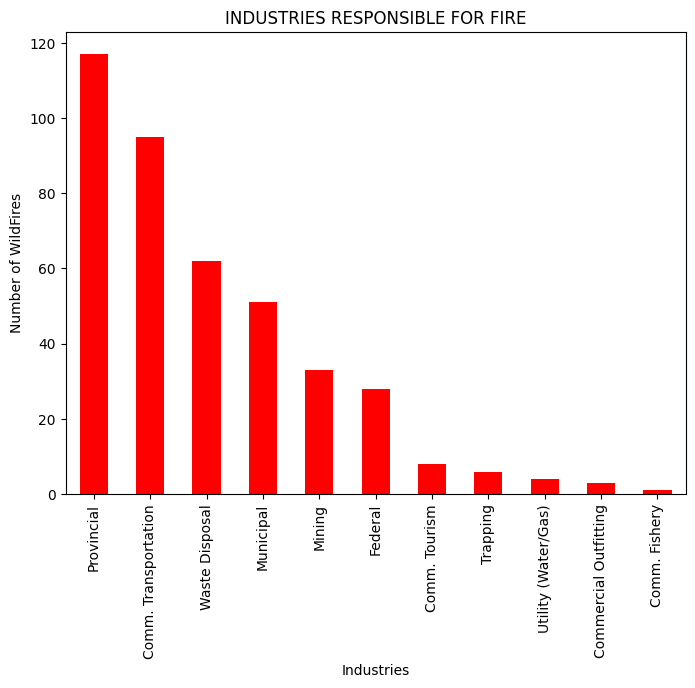

In [151]:
# Create a bar chart-
data_to_plot = fire_data[fire_data['industry_identifier_desc'] != 'undetermined']['industry_identifier_desc'].value_counts()

# Combine data for plotting
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

# Add labels and title
plt.xlabel('Industries')
plt.ylabel('Number of WildFires')
plt.title('INDUSTRIES RESPONSIBLE FOR FIRE')

# Display the plot
plt.show()

In [152]:
fire_data['responsible_group_desc'].value_counts()

responsible_group_desc
undetermined                   13880
Campers                         4362
Resident                        2125
Others (explain in remarks)      990
Maintenance/Service              334
Hunters                          309
Operators                        198
ATV Users                        161
Contractors                      133
Mechanized Travel                121
Contractors or Agents             52
Construction Workers              52
Employees                         36
Picnickers                        24
Animal(s)                         20
Fishermen                         19
Boat/canoe/kayak                  15
Hikers                            15
Cover-up                          12
Other Employees                   12
Dare                               9
Illness                            9
Grudge                             8
Berry Pickers                      3
Trappers                           3
Horseback Riders                   3
Employment     

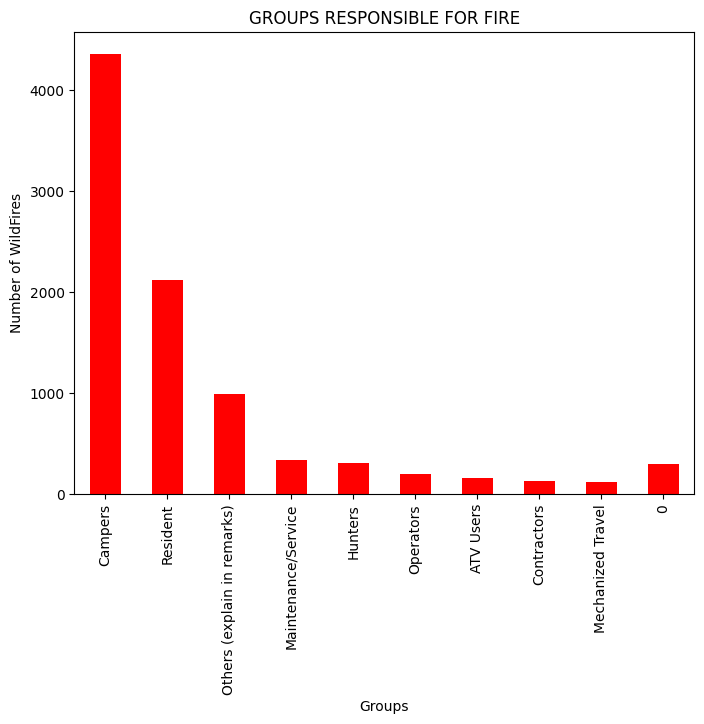

In [153]:
# Create a bar chart-
value_counts = fire_data[fire_data['responsible_group_desc'] != 'undetermined']['responsible_group_desc'].value_counts()
top_9 = value_counts.nlargest(9)
others = value_counts.iloc[9:].sum()

data_to_plot = pd.concat([top_9, pd.Series([others], name="Others")])
# Combine data for plotting
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Number of WildFires')
plt.title('GROUPS RESPONSIBLE FOR FIRE')

# Display the plot
plt.show()

In [154]:
fire_data['activity_class'].value_counts()

activity_class
undetermined            8707
Cooking and Warming     3035
Cooking                 1914
Debris Disposal         1613
Unclassified            1299
Operations              1014
Piles                    603
Grass                    601
Arson                    593
Lighting Fires           461
Refuse                   451
Power Lines              417
Transportation           317
Children                 292
Brush                    208
Refuse Disposal          194
OHV Operation            180
Flaring Gas              150
Vehicle Trans.           149
All Terrain Vehicles     138
Structure Fire           108
Slash                    102
Traditional Burning       67
Heavy Equipment           67
Rail Transportation       55
Restart                   45
Windrows                  43
Smoking                   22
Ammunition                20
Pipelines                 18
Welders                   16
Prescribed Fire            7
Power Saw                  5
Refuelling                 1

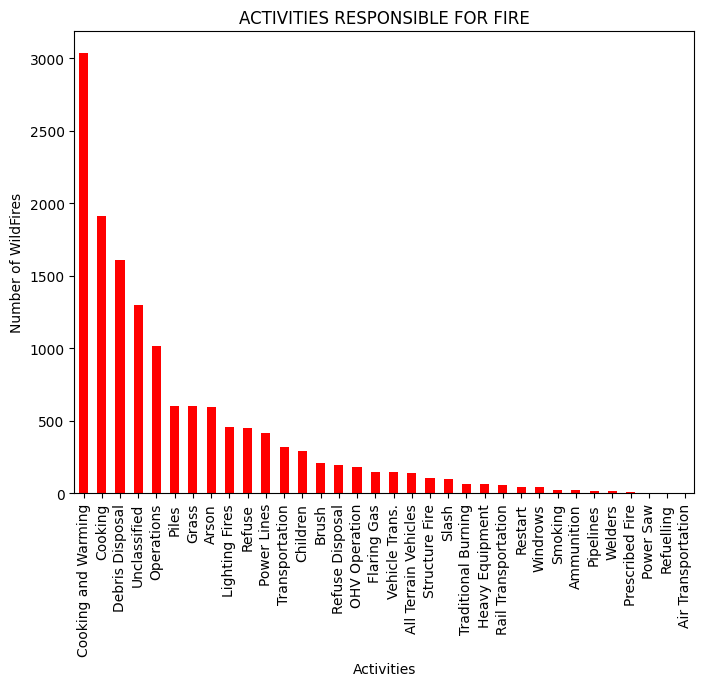

In [155]:
# Create a bar chart-
data_to_plot = fire_data[fire_data['activity_class'] != 'undetermined']['activity_class'].value_counts()

# Combine data for plotting
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

# Add labels and title
plt.xlabel('Activities')
plt.ylabel('Number of WildFires')
plt.title('ACTIVITIES RESPONSIBLE FOR FIRE')

# Display the plot
plt.show()

In [156]:
fire_data['true_cause'].value_counts()

true_cause
undetermined              10423
Unsafe Fire                4690
Abandoned Fire             2084
Burning Substance          1168
Permit Related             1148
Line Impact                 509
Arson Suspected             423
Winter Burning              419
Unpredictable Event         364
Insufficient Buffer         361
Mechanical Failure          331
Vehicle Fire                177
Hot Exhaust                 155
Friction Spark              151
Unattended Fire             143
Unclassified                140
Arson Known                  59
High Hazard                  58
Animals                      47
Incendiary Device            42
Flammable Fluids             17
Insufficient Resources        4
Name: count, dtype: int64

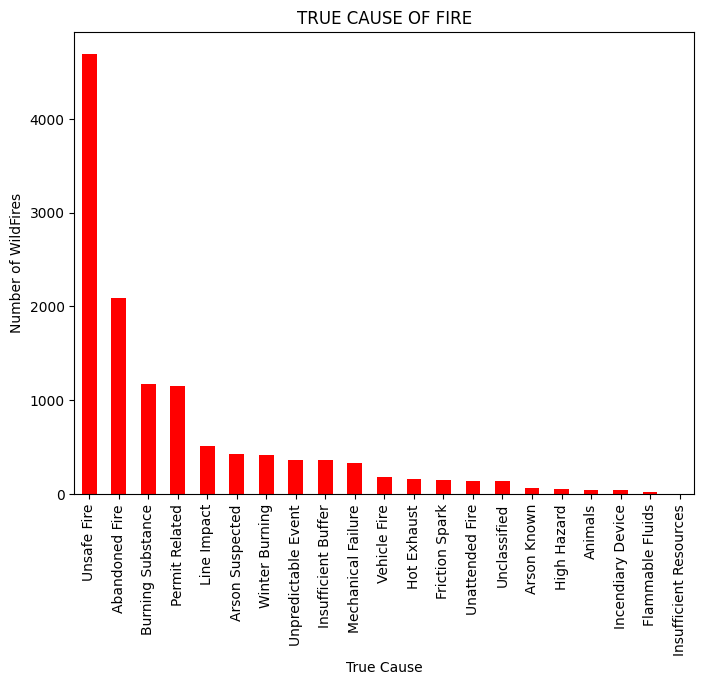

In [157]:
# Create a bar chart-
data_to_plot = fire_data[fire_data['true_cause'] != 'undetermined']['true_cause'].value_counts()

# Combine data for plotting
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

# Add labels and title
plt.xlabel('True Cause')
plt.ylabel('Number of WildFires')
plt.title('TRUE CAUSE OF FIRE')

# Display the plot
plt.show()

In [158]:
fire_data['activity_class'].value_counts()

activity_class
undetermined            8707
Cooking and Warming     3035
Cooking                 1914
Debris Disposal         1613
Unclassified            1299
Operations              1014
Piles                    603
Grass                    601
Arson                    593
Lighting Fires           461
Refuse                   451
Power Lines              417
Transportation           317
Children                 292
Brush                    208
Refuse Disposal          194
OHV Operation            180
Flaring Gas              150
Vehicle Trans.           149
All Terrain Vehicles     138
Structure Fire           108
Slash                    102
Traditional Burning       67
Heavy Equipment           67
Rail Transportation       55
Restart                   45
Windrows                  43
Smoking                   22
Ammunition                20
Pipelines                 18
Welders                   16
Prescribed Fire            7
Power Saw                  5
Refuelling                 1

### Exploring Associations

In [159]:
a1 = fire_data.groupby(['responsible_group_desc', 'activity_class','general_cause_desc']).size().reset_index(name='counts')
a1 = a1.sort_values(by='counts', ascending=False).reset_index(drop=True)

a1.iloc[:10]

,responsible_group_desc,activity_class,general_cause_desc,counts
0,undetermined,undetermined,Lightning,7870
1,Campers,Cooking and Warming,Recreation,2659
2,Campers,Cooking,Recreation,1613
3,undetermined,Debris Disposal,Resident,979
4,undetermined,Unclassified,Incendiary,919
5,undetermined,undetermined,Undetermined,736
6,undetermined,Operations,Power Line Industry,725
7,undetermined,Arson,Incendiary,593
8,Resident,Grass,Resident,553
9,Others (explain in remarks),Lighting Fires,Incendiary,420


In [160]:
a1['combination']=a1['responsible_group_desc']+'+'+a1['activity_class']+'+'+a1['general_cause_desc']

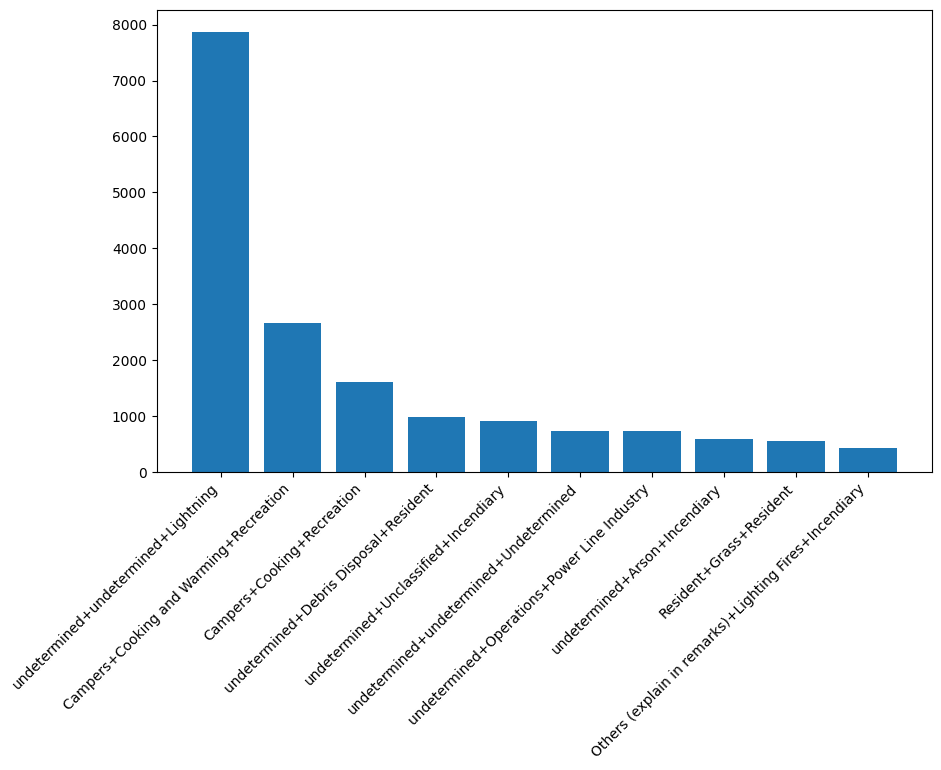

In [161]:
# Create a bar chart
a1['combination'] = a1['combination'].astype('category')

top_10_days = a1.nlargest(10, 'counts')['combination']

plt.figure(figsize=(10, 6)) 
plt.bar(top_10_days, a1[a1['combination'].isin(top_10_days)]['counts'])
plt.xticks(rotation=45,ha='right') 
plt.show()

### What were the reasons for fire in highly burnt areas

In [162]:
fire_data['current_size'].describe()

count     22913.000000
mean        155.067415
std        5906.810285
min           0.010000
25%           0.010000
50%           0.020000
75%           0.300000
max      577646.800000
Name: current_size, dtype: float64

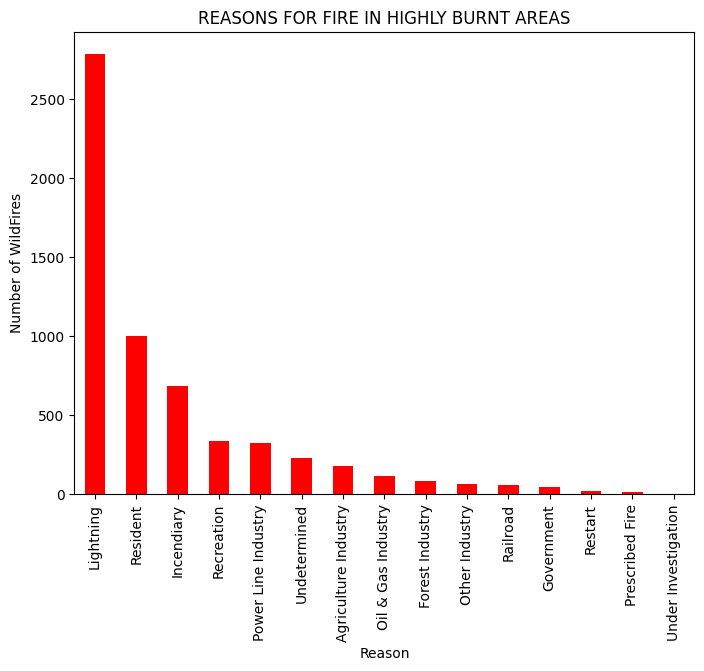

In [163]:
#lets calculate the reasons for fire in case of top 25%ile
df2=fire_data[fire_data['current_size']>=0.3]

data_to_plot = df2[df2['general_cause_desc'] != 'undetermined']['general_cause_desc'].value_counts()

plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

plt.xlabel('Reason')
plt.ylabel('Number of WildFires')
plt.title('REASONS FOR FIRE IN HIGHLY BURNT AREAS')
plt.show()

In [164]:
df2['industry_identifier_desc'].value_counts
#as we can see, there is almost no involvement of industries in such fires

<bound method IndexOpsMixin.value_counts of 0        undetermined
4        undetermined
7        undetermined
9        undetermined
26       undetermined
             ...     
22896    undetermined
22902    undetermined
22905    undetermined
22906    undetermined
22910    undetermined
Name: industry_identifier_desc, Length: 5907, dtype: object>

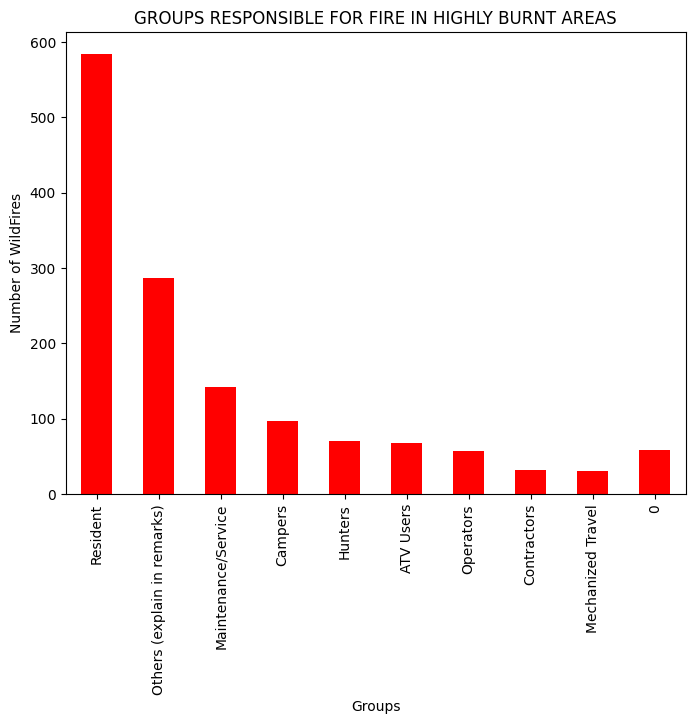

In [165]:
# Create a bar chart-
value_counts = df2[df2['responsible_group_desc'] != 'undetermined']['responsible_group_desc'].value_counts()
top_9 = value_counts.nlargest(9)
others = value_counts.iloc[9:].sum()

data_to_plot = pd.concat([top_9, pd.Series([others], name="Others")])

plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

plt.xlabel('Groups')
plt.ylabel('Number of WildFires')
plt.title('GROUPS RESPONSIBLE FOR FIRE IN HIGHLY BURNT AREAS')
plt.show()

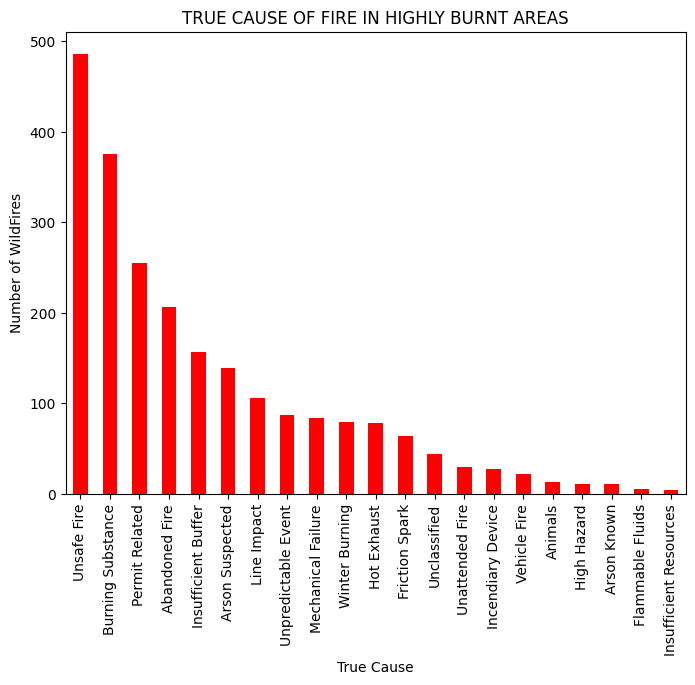

In [166]:
# Create a bar chart-
data_to_plot = df2[df2['true_cause'] != 'undetermined']['true_cause'].value_counts()

plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

plt.xlabel('True Cause')
plt.ylabel('Number of WildFires')
plt.title('TRUE CAUSE OF FIRE IN HIGHLY BURNT AREAS')
plt.show()

### Finding the Most Vulnerable Population

In [167]:
#Finding most frequent vegetations in highly burnt areas
df2['fuel_type'].value_counts()

fuel_type
C2     2351
O1a    1272
O1b     584
M2      433
M1      220
C1      214
D1      154
C3      153
S1       88
S2       78
C4       42
C7        4
M4        1
Name: count, dtype: int64

Finding the most Frequent FSA Regions with high burnt size as well as with cause= natural(lightning) and most frequent fuel type (vegetation)

In [168]:
df3=df2[df2['general_cause_desc'] == 'Lightning'][(df2['fuel_type']=='C2')|
                           (df2['fuel_type']=='O1a')|(df2['fuel_type']=='M2')|
                           (df2['fuel_type']=='O1b')]

C:\Users\saubh\AppData\Local\Temp\ipykernel_9732\1637484134.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[df2['general_cause_desc'] == 'Lightning'][(df2['fuel_type']=='C2')|


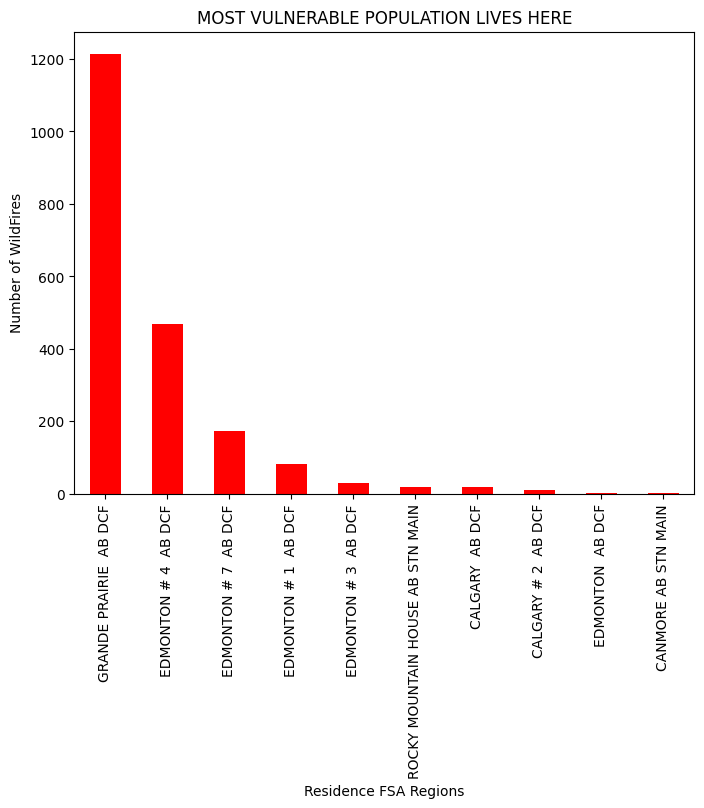

In [169]:
# Create a bar chart
data_to_plot=df3['FSAName'].value_counts()

# Combine data for plotting
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

# Add labels and title
plt.xlabel('Residence FSA Regions')
plt.ylabel('Number of WildFires')
plt.title('MOST VULNERABLE POPULATION LIVES HERE')

# Display the plot
plt.show()

### Impact on Indigenous Population

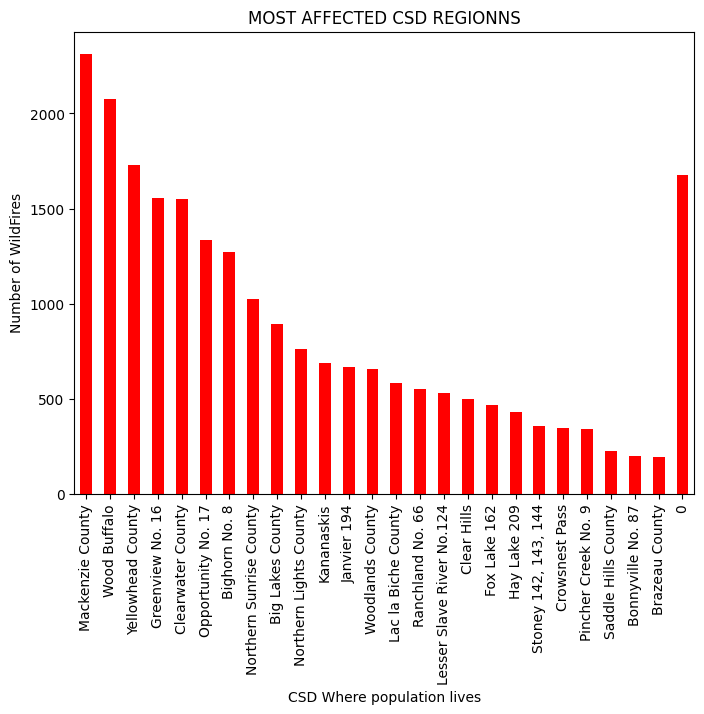

In [191]:
# Create a bar chart
value_counts=fire_data['CSDNAME'].value_counts()
top_9 = value_counts.nlargest(25)
others = value_counts.iloc[25:].sum()

data_to_plot = pd.concat([top_9, pd.Series([others], name="Others")])
# Combine data for plotting
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

# Add labels and title
plt.xlabel('CSD Where population lives')
plt.ylabel('Number of WildFires')
plt.title('MOST AFFECTED CSD REGIONNS')

# Display the plot
plt.show()

In [171]:
fire_data['indi_population'].describe()

count     21706.000000
mean      27776.693080
std       43847.095101
min         135.000000
25%        3730.000000
50%       14105.000000
75%       25220.000000
max      159500.000000
Name: indi_population, dtype: float64

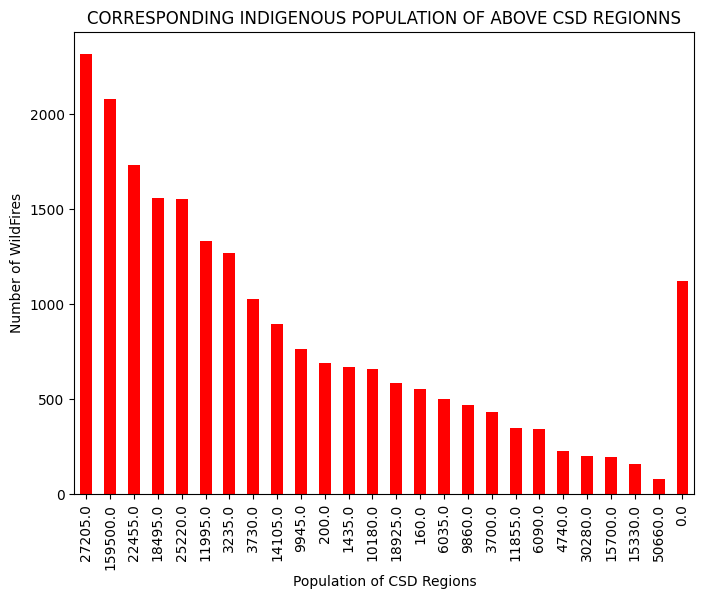

In [172]:
# Create a bar chart
value_counts=fire_data['indi_population'].value_counts()
top_9 = value_counts.nlargest(25)
others = value_counts.iloc[25:].sum()

data_to_plot = pd.concat([top_9, pd.Series([others], name="Others")])
# Combine data for plotting
plt.figure(figsize=(8, 6))
data_to_plot.plot(kind='bar', color='red')  

# Add labels and title
plt.xlabel('Population of CSD Regions')
plt.ylabel('Number of WildFires')
plt.title('CORRESPONDING INDIGENOUS POPULATION OF ABOVE CSD REGIONNS')

# Display the plot
plt.show()

In [173]:
#Top 10 CSD populaion is most vulnerable to fire
value_counts_dict = fire_data['indi_population'].value_counts().iloc[:10].to_dict()
sum=0
for i in value_counts_dict:
    sum+=i
print("INDIGENOUS POPULATION MOST VULNERABLE TO WILDFIRE = ",int(sum))

INDIGENOUS POPULATION MOST VULNERABLE TO WILDFIRE =  295885


#  Predicting the Severity of Wildfires and the Final Size

### Preparing train and test datasets

In [174]:
train_data=fire_data[['fire_year','fire_fighting_start_size','fire_origin',
                      'FSACode','fuel_type','general_cause_desc','fire_position_on_slope',
                      'weather_conditions_over_fire','temperature','relative_humidity','wind_direction','wind_speed']]

In [175]:
test_data=fire_data[['current_size']]

In [176]:
train_data.isnull().sum()

fire_year                          0
fire_fighting_start_size        6409
fire_origin                        0
FSACode                            0
fuel_type                       6889
general_cause_desc                 0
fire_position_on_slope          2649
weather_conditions_over_fire    2656
temperature                     2657
relative_humidity               2659
wind_direction                  2660
wind_speed                      2660
dtype: int64

In [177]:
train_data=train_data.ffill()

### Encoding and Standardization of data

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [179]:
X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2, random_state=42)

In [180]:
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [181]:
numeric_features = ['fire_year','fire_fighting_start_size','temperature', 'relative_humidity', 'wind_speed']
categorical_features = ['fire_origin', 'FSACode', 'general_cause_desc','fuel_type','fire_position_on_slope','weather_conditions_over_fire','wind_direction']

In [182]:
# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [183]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [184]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Defining and Training the Model

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [186]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [187]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fire_year',
                                                   'fire_fighting_start_size',
                                                   'temperature',
                                                   'relative_humidity',
                                                   'wind_speed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fire_origin', 'FSACode',
                                                   'general_cause_desc',
                                                   'fuel_type',
                                                   'fire_position_on_slope',
                                                   'weather_conditions_over_fire',
                                                   'wind_direction'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [188]:
y_pred = model.predict(X_test)

### Evaluating the model and Visualizing the results

In [189]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 21694134.506138425
R-squared: -0.6738449419526171


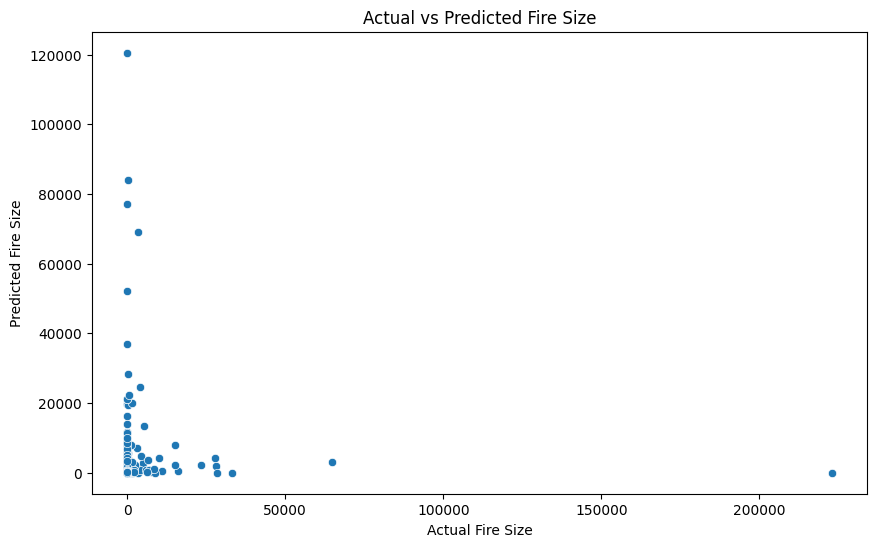

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Fire Size')
plt.ylabel('Predicted Fire Size')
plt.title('Actual vs Predicted Fire Size')
plt.show()


# THANKS!!
### ~Saubhagya Pandey (230939)